The value of x at 3.5e6 is  2.502161651991021


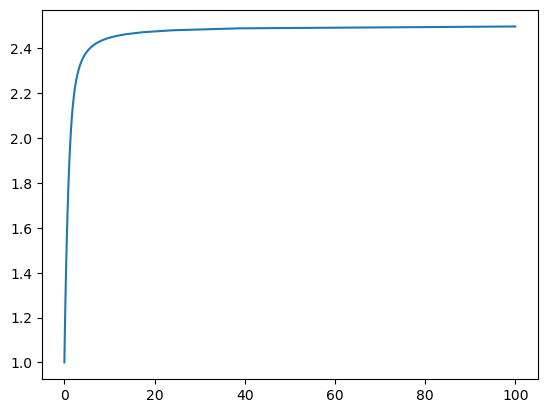

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def xpt(x,t):
    return (1/(x**2+t**2))

# We will change the variable t to g such that t = tan g, So, dx/dg will become -
def xpg(x,g):
    return (1/(x**2+(np.tan(g)**2)))*(1/(np.cos(g)**2))

def ode_solve_RK4(f,t_arr,y_arr0):
    y_mat=np.zeros((len(t_arr),len(y_arr0)))
    h=t_arr[1]-t_arr[0]
    y_mat[0,:]=y_arr0
    for i in range(len(t_arr)-1):
        k1=h*f(t_arr[i],y_mat[i,:])
        k2=h*f(t_arr[i]+(h/2),y_mat[i,:]+k1/2)
        k3=h*f(t_arr[i]+(h/2),y_mat[i,:]+k2/2)
        k4=h*f(t_arr[i]+h,y_mat[i,:]+k3)
        y_mat[i+1,:]=y_mat[i,:]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    return y_mat

g0=0
gn1=((np.pi/2)-0.01)
g_arr1=np.linspace(g0,gn,100)

y0=1

x_arr1=ode_solve_RK4(xpg,g_arr1,[y0])[:,0]
t_arr1=np.tan(g_arr1)
plt.plot(t_arr1,x_arr1)

g0=0
gn2=((np.pi/2)-0.00001)
g_arr2=np.linspace(g0,gn2,100)

y0=1

x_arr2=ode_solve_RK4(xpg,g_arr2,[y0])[:,0]
t_arr2=np.tan(g_arr2)

t_interpolation = 3.5e6
x_interpolation = np.interp(t_interpolation, t_arr2, x_arr2)
print("The value of x at 3.5e6 is ",x_interpolation)